In [14]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Get the dataset
dataset = pd.read_csv(r'linear_regression_dataset.csv')
dataset.head()

,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
0,17,1,2,1,2660,560
1,17,0,2,1,1689,753
2,17,1,7,1,20060,930
3,17,1,1,1,736,758
4,17,1,1,1,1194,754


In [18]:
#Separating the independent and dependent features
#Dependent features
y = np.asarray(dataset['TOTCHG'].values.tolist())

In [19]:
# Independent Features
# Now, our dataset has only independent features
dataset.drop(["TOTCHG"], axis = 1, inplace = True)

In [20]:
X = np.asarray(dataset.values.tolist())


In [21]:
#Get the shapes of X and y
print("The shape of the independent features are ",X.shape)
print("The shape of the dependent features are ",y.shape)

The shape of the independent features are  (500, 5)
The shape of the dependent features are  (500,)


In [22]:
dataset['RACE'].unique()

array([1, 4, 6, 2, 5, 3])

In [23]:
dataset['LOS'].unique()

array([ 2,  7,  1,  0,  4,  3,  5, 12,  6, 41, 17, 10, 39,  8, 18, 15,  9,
       23, 24])

In [24]:
dataset['APRDRG'].unique()

array([560, 753, 930, 758, 754, 347, 751, 812, 566, 249, 422,  50, 139,
       141, 420,  97, 811, 755, 720,  53, 760, 710, 776, 115, 602, 138,
       137, 640, 639, 143, 254, 581, 633, 626, 636,  23,  57, 421, 580,
       750,  49,  51, 313, 614, 634, 952,  21,  92, 756, 317, 344, 114,
       206, 723, 911,  54, 225,  58, 740, 308, 204, 561, 863])

In [25]:
dataset['FEMALE'].unique()

array([1, 0])

In [26]:
dataset['AGE'].unique()

array([17, 16, 15, 14, 13, 12, 11, 10,  7,  6,  3,  2,  1,  0,  5,  4,  8,
        9])

In [27]:
#Reshaping the Dependent features
y = y.reshape(len(y),1) # Changing the shape from (500,) to (500,1)

#Feature Scaling for Independent Variables
for i in [0,2,4]:
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

#Feature Scaling for Dependent Variables
y = (y - int(np.mean(y)))/np.std(y)

In [28]:
#Let's create a DataFrame "Independent_Variables" to visualize our final independent features
Indpendent_Variables = pd.DataFrame(X)

In [29]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [32]:
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i])
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization
    print("Debug W:", W)

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    print("Debug:", X.shape[0])
    print("Debug: ", train_indices)
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
        #print("Debug i, W[0]:", "i=", i, W[0])

      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss


  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

Debug W: [[-0.0298157  -0.00262836 -0.09681399  0.00943893  0.02619455]]
Debug: 400
Debug:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 20

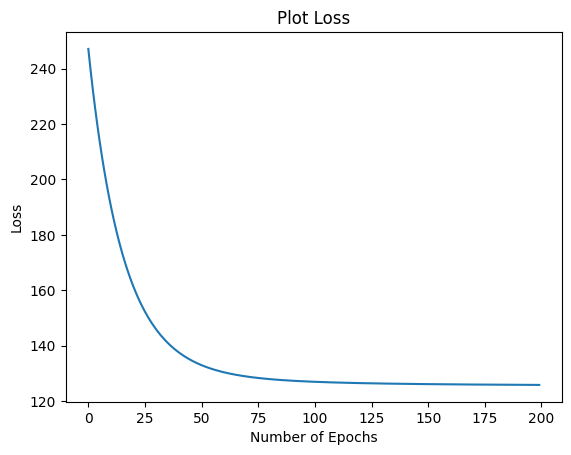

In [33]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

#declaring the "regressor" as an object of the class LinearRegression
regressor = multipleLinearRegression()

#Training
epochs = 200
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=epochs, alpha=0.0001)


#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

#Plot the Train Loss
regressor.plotLoss(train_loss, num_epochs)